**P303- Company Stock Price Prediction**
**Type- Forecasting:Time Series Analysis**


Step 1. Importing Required Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Step 2. Uploading Required data set

In [2]:
df = pd.read_excel('/content/Company stock prices.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900
...,...,...,...,...,...,...,...
748,2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900
749,2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400
750,2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100
751,2023-10-13,355.640015,358.929993,352.049988,355.679993,355.679993,6312600


Step 3: Exploratory Data Analysis

In [4]:
print(type(df)) # Understanding the data structure
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(753, 7)


In [ ]:
df.info() #find missing values and understanding the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       753 non-null    object 
 1   Open       753 non-null    float64
 2   High       753 non-null    float64
 3   Low        753 non-null    float64
 4   Close      753 non-null    float64
 5   Adj Close  753 non-null    float64
 6   Volume     753 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.3+ KB


Observation: Date columne Data type need to be changed to Datetime

In [9]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Volume     753 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 41.3 KB


In [ ]:
df.isnull().any() # Finding the missing values

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe() # Descriptive statistics

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,414.903107,421.117954,408.519270,414.796653,414.796653,7.060370e+06
std,135.039753,135.568500,134.016834,134.669664,134.669664,7.470407e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,311.570007,319.799988,308.850006,313.480011,313.480011,3.629200e+06
50%,418.399994,425.260010,411.880005,416.029999,416.029999,5.277700e+06
75%,519.900024,526.380005,513.789978,519.780029,519.780029,7.973300e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


Step 4: Data Visualisation

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') # Month & Year Extraction from date column for better visualisation
df["month"] = df.Date.dt.strftime("%b")
df["year"] = df.Date.dt.strftime("%Y")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,month,year
0,2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020
1,2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020
2,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020
3,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020
4,2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020
5,2020-10-26,487.029999,496.820007,478.899994,488.239990,488.239990,6186100,Oct,2020
6,2020-10-27,490.010010,490.489990,482.929993,488.929993,488.929993,3627200,Oct,2020
7,2020-10-28,486.359985,494.000000,483.279999,486.239990,486.239990,5992700,Oct,2020
8,2020-10-29,488.500000,513.900024,479.339996,504.209991,504.209991,11120700,Oct,2020
9,2020-10-30,502.010010,505.880005,472.209991,475.739990,475.739990,7807900,Oct,2020


In [13]:
df.set_index('Date',inplace=True) # Setting Date column as index.
df.index.year

Int64Index([2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=753)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,month,year
Date,,,,,,,,
2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020
2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020
2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020
2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020
2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020
...,...,...,...,...,...,...,...,...
2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900,Oct,2023
2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400,Oct,2023
2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100,Oct,2023


Line Plot

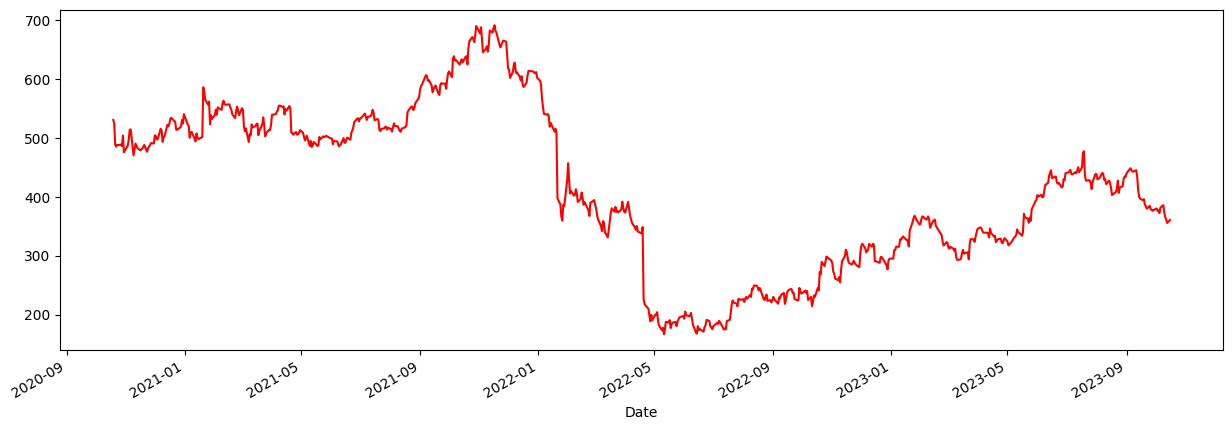

In [16]:
df['Close'].plot(figsize=(15, 5),color='red')
plt.show()

Observation:


1.   Non Seasonality:
There are no Seasonal or regular pattern fluctuations in the Closing stock price
Random Fluctuations are seen in Stock price increase.
Thus we can say there is no seasonality or data is unsystematic.

2.  Quadratic Trend:
No increasing or decreasing trend is seen in the graph even if change the aspect ratio. No scaling effect.



array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

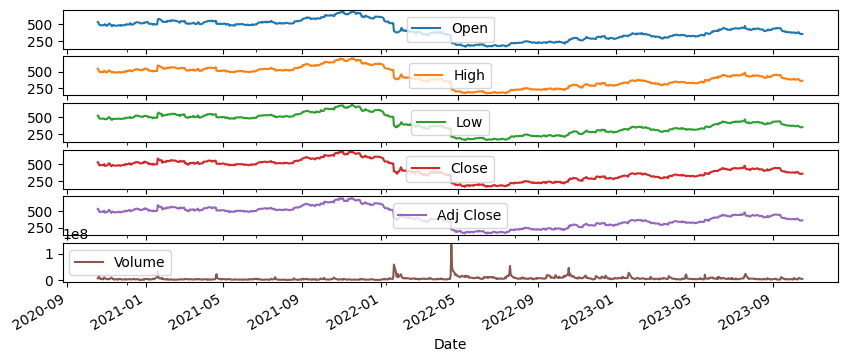

In [ ]:
df.plot(subplots=True, figsize=(10, 4))

Observation:
1.  We see highest Volume sales in month of May 2022

Dist Plot: Seaborn Distplot represents the overall distribution of continuous data variables.

<ipython-input-20-b2bc50cc8591>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
<ipython-input-20-b2bc50cc8591>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-20-b2bc50cc8591>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the ne

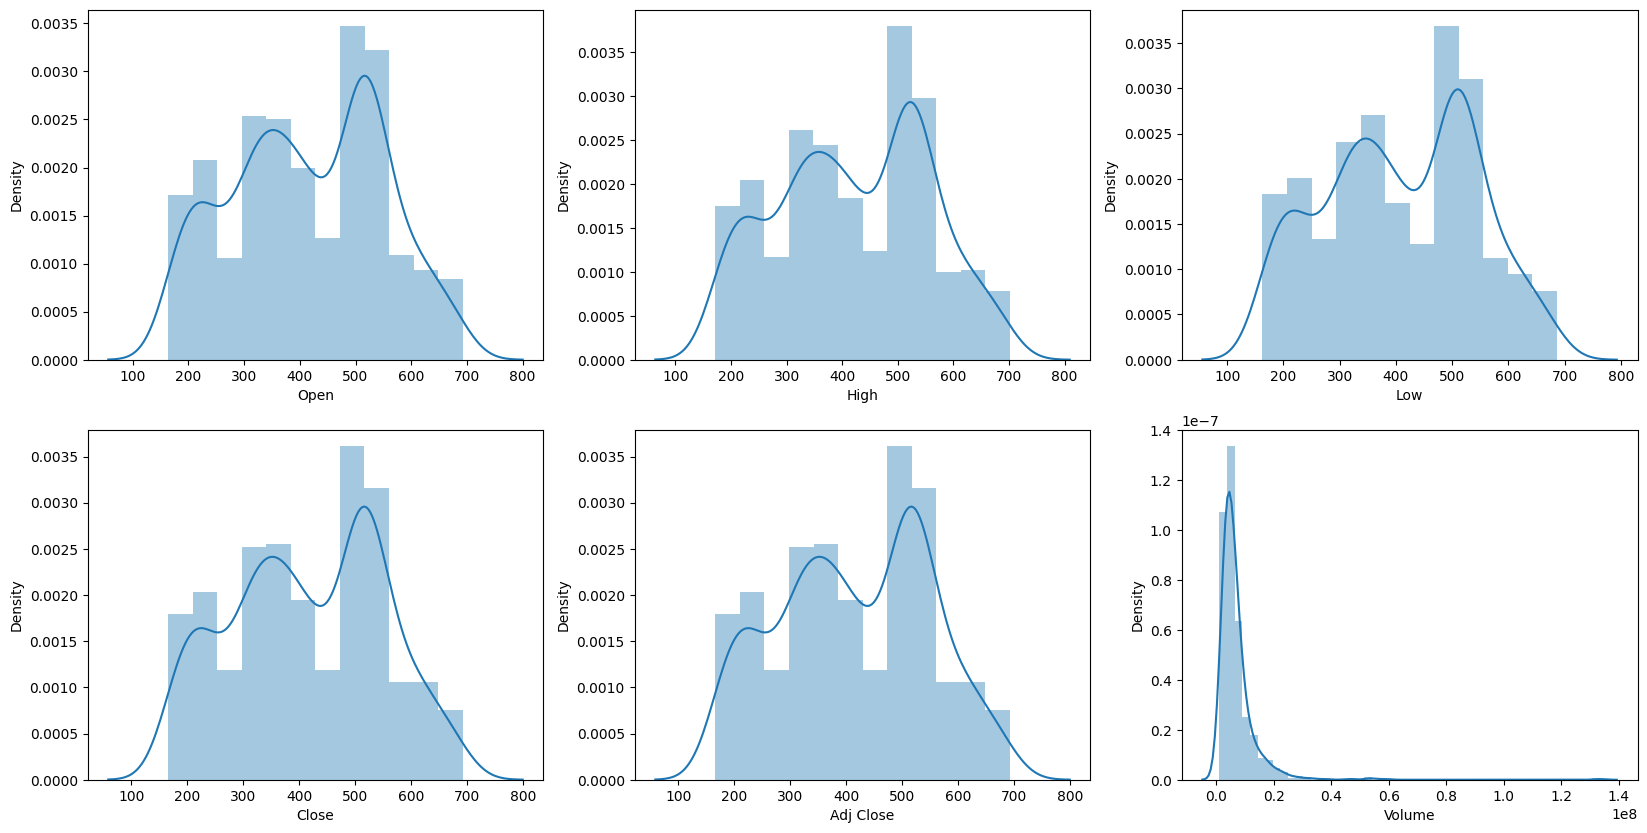

In [20]:
features = ['Open','High','Low','Close','Adj Close','Volume']
plt.subplots(figsize= (20,10))
for i, col in enumerate (features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

Observation:

1.    We see Similar two peeks in Open,High,Close,Adj Close showing the stock prices have varied significatnly at the respective duration.
2.   Also, volume data looks left skewed






<Axes: xlabel='year', ylabel='Volume'>

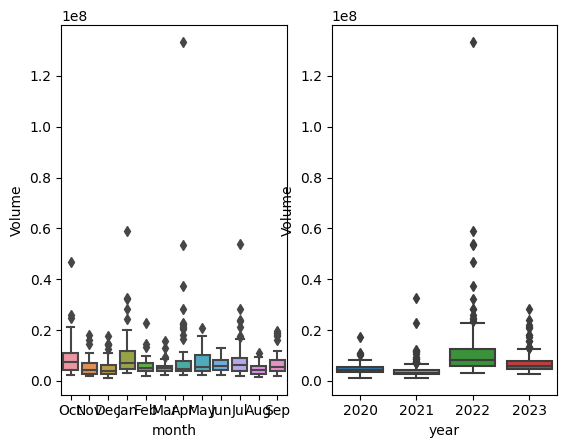

In [35]:
plt.subplot(1,2,1)
sns.boxplot(x='month', y='Volume', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='year', y='Volume', data=df)

Obsevation:

Further when we go for Volume Box plot we can clearly see outlier in data

Heat Map: To better visualize the Mean of Closing Stock Price Month & Year Wise

<Axes: xlabel='month', ylabel='year'>

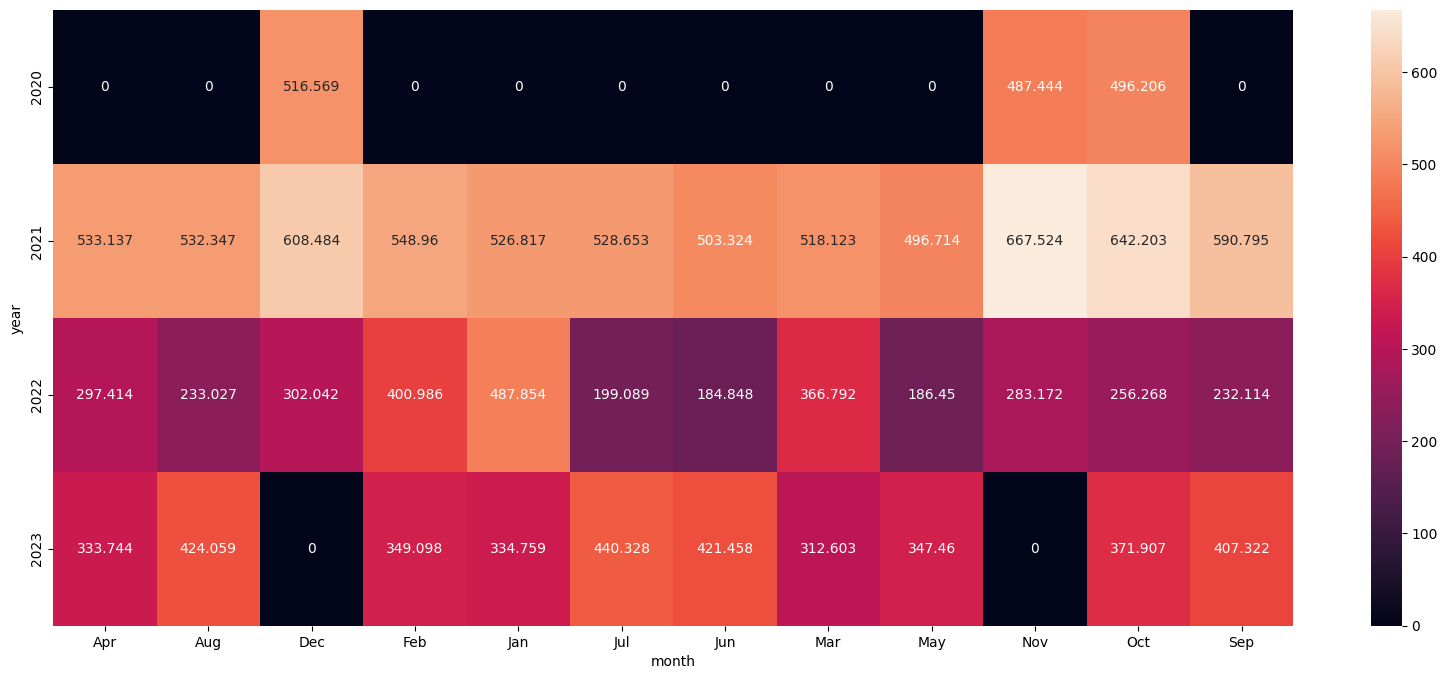

In [ ]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Close",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

Pair Plot: used to understand the best set of features to explain a relationship between two variables

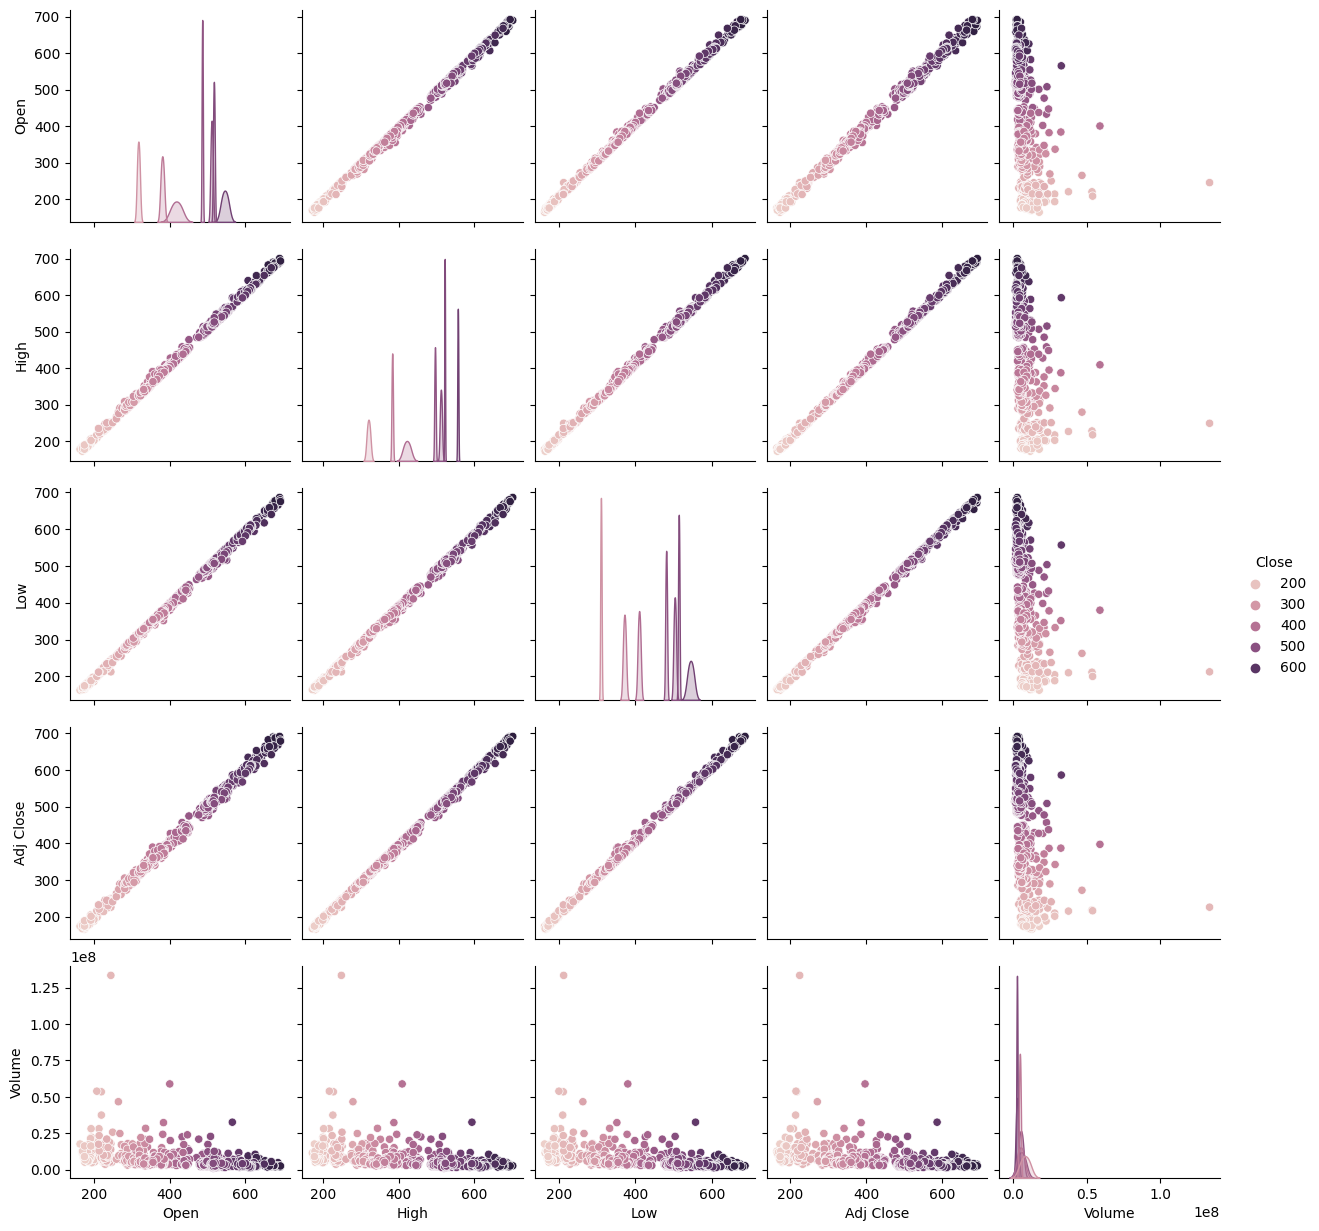

In [36]:
sns.pairplot(df,hue='Close')
plt.show()

Observations:
As we see Collinearity between DV -High,Open,adj Close & Close
We can move ahead with reducing the Features.

Conversion of Non Stationary Data to Stationary with Diff() method

In [39]:
df['Close_Diff']=df['Close'].diff(periods=1)
df

,Open,High,Low,Close,Adj Close,Volume,month,year,Close_Diff
Date,,,,,,,,,
2020-10-19,537.070007,541.799988,525.380005,530.719971,530.719971,7567500,Oct,2020,NaN
2020-10-20,528.140015,533.780029,522.260010,525.419983,525.419983,10047200,Oct,2020,-5.299988
2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,Oct,2020,-36.369995
2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900,Oct,2020,-3.819977
2020-10-23,488.109985,490.059998,481.350006,488.279999,488.279999,4927900,Oct,2020,3.049988
...,...,...,...,...,...,...,...,...,...
2023-10-10,385.579987,388.700012,372.250000,373.320007,373.320007,7288900,Oct,2023,-12.630005
2023-10-11,372.779999,377.809998,365.339996,365.929993,365.929993,9151400,Oct,2023,-7.390014
2023-10-12,366.480011,368.829987,359.049988,361.200012,361.200012,7376100,Oct,2023,-4.729981


In [40]:
df=df.dropna()

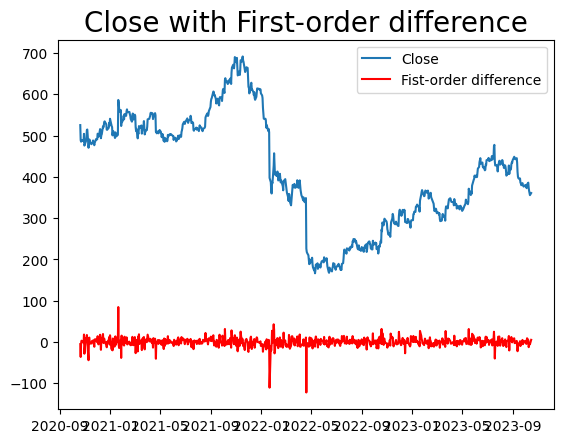

In [41]:
#plot
plt.title("Close with First-order difference", size=20)
plt.plot(df['Close'], label='Close')
plt.plot(df['Close_Diff'], label='Fist-order difference',color='red')
plt.legend()

In [42]:
acf_values = acf(df['Close_Diff'])
np.round(acf_values,2)

array([ 1.  ,  0.03, -0.03,  0.01, -0.02, -0.02, -0.03, -0.01,  0.03,
        0.05,  0.01,  0.02,  0.03,  0.04,  0.05, -0.03, -0.01, -0.06,
        0.04,  0.04,  0.01, -0.02, -0.05, -0.04,  0.01, -0.01,  0.01,
        0.05, -0.04])

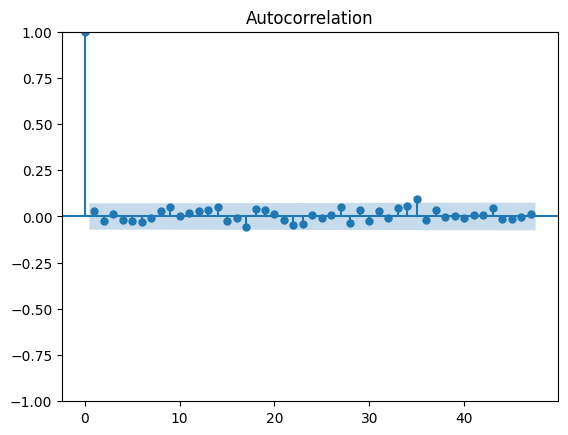

In [43]:
# Plot ACF
plot_acf(df['Close_Diff'], lags=47);

In [44]:
# Calculate PACF
pacf_values = pacf(df['Close_Diff'])
np.round(pacf_values,2)

array([ 1.  ,  0.03, -0.03,  0.01, -0.02, -0.02, -0.03, -0.01,  0.03,
        0.05,  0.  ,  0.02,  0.03,  0.04,  0.06, -0.03, -0.01, -0.06,
        0.05,  0.03,  0.01, -0.03, -0.06, -0.05,  0.01, -0.  ,  0.01,
        0.04, -0.05])

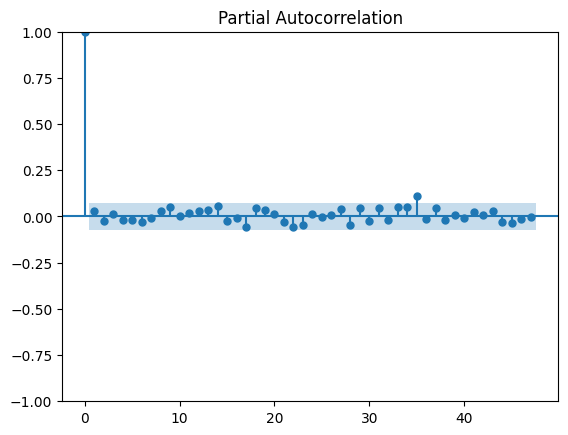

In [45]:
# Plot PACF
plot_pacf(df['Close_Diff'],lags=47);